In [1]:
import lightkurve as lk
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
search_result = lk.search_lightcurve(target = 'WASP-135')
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 26,2020,SPOC,120,308172249,0.0
1,TESS Sector 26,2020,TESS-SPOC,1800,308172249,0.0
2,TESS Sector 26,2020,QLP,1800,308172249,0.0


In [3]:
search_result[0]

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 26,2020,SPOC,120,308172249,0.0


In [4]:
for column in search_result.table.columns:
    print(column)

dataproduct_type
calib_level
obs_collection
obs_id
target_name
s_ra
s_dec
t_min
t_max
t_exptime
wavelength_region
filters
em_min
em_max
target_classification
obs_title
t_obs_release
instrument_name
proposal_pi
proposal_id
proposal_type
project
sequence_number
provenance_name
s_region
jpegURL
dataURL
dataRights
mtFlag
srcDen
intentType
obsid
objID
objID1
distance
exptime
obsID
obs_collection_products
dataproduct_type_products
description
type
dataURI
productType
productGroupDescription
productSubGroupDescription
productDocumentationURL
project_products
prvversion
proposal_id_products
productFilename
size
parent_obsid
dataRights_products
calib_level_products
author
mission
#
year
sort_order


In [13]:
lc = search_result[0].download()
lc

time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
2010.2711041046398,1.6583137e+03,1.0736320e+01,3.4553942e-03,563625,468.24093,1353.03409,1.5154197e+03,7.6196442e+00,9.2796637e+02,3.3236256e+00,1.6583137e+03,1.0736320e+01,0,———,———,———,———,468.24093,2.9801840e-03,1353.03409,3.0106017e-03,8.0528475e-02,4.9941791e-03
2010.2724929959206,1.6662190e+03,1.0758003e+01,3.4553972e-03,563626,468.23420,1353.02831,1.5252433e+03,7.6350331e+00,9.2504132e+02,3.3315911e+00,1.6662190e+03,1.0758003e+01,0,———,———,———,———,468.23420,2.9630126e-03,1353.02831,3.0028045e-03,7.1789280e-02,5.5440487e-03
2010.273881887201,1.6531201e+03,1.0728870e+01,3.4554002e-03,563627,468.24618,1353.03506,1.5128638e+03,7.6143575e+00,9.2206293e+02,3.3235435e+00,1.6531201e+03,1.0728870e+01,0,———,———,———,———,468.24618,2.9847890e-03,1353.03506,3.0173264e-03,8.0952406e-02,1.1733708e-02
2010.2752707784814,1.6666927e+03,1.0746798e+01,3.4554033e-03,563628,468.24091,1353.03076,1.5247965e+03,7.6270804e+00,9.2620477e+02,3.3258736e+00,1.6666927e+03,1.0746798e+01,0,———,———,———,———,468.24091,2.9631285e-03,1353.03076,2.9932272e-03,7.4253403e-02,9.2223873e-03
2010.2766596697622,1.6638854e+03,1.0729400e+01,3.4554063e-03,563629,468.24027,1353.03018,1.5163981e+03,7.6147323e+00,9.2625055e+02,3.3212817e+00,1.6638854e+03,1.0729400e+01,0,———,———,———,———,468.24027,2.9682654e-03,1353.03018,3.0118364e-03,7.8323893e-02,-2.9108408e-03
2010.2780485610426,1.6590623e+03,1.0732516e+01,3.4554093e-03,563630,468.24138,1353.03548,1.5166721e+03,7.6169448e+00,9.2926605e+02,3.3254809e+00,1.6590623e+03,1.0732516e+01,0,———,———,———,———,468.24138,2.9719921e-03,1353.03548,3.0088173e-03,7.7022813e-02,6.4385664e-03
2010.279437452323,1.6537466e+03,1.0741038e+01,3.4554123e-03,563631,468.24372,1353.03306,1.5179236e+03,7.6229930e+00,9.2867249e+02,3.3319306e+00,1.6537466e+03,1.0741038e+01,0,———,———,———,———,468.24372,2.9736275e-03,1353.03306,3.0127647e-03,7.6943055e-02,1.0817516e-02
2010.2808263436038,1.6664467e+03,1.0748543e+01,3.4554154e-03,563632,468.24321,1353.03228,1.5215084e+03,7.6283188e+00,9.2966016e+02,3.3378174e+00,1.6664467e+03,1.0748543e+01,0,———,———,———,———,468.24321,2.9714657e-03,1353.03228,3.0066047e-03,7.9948165e-02,1.3098537e-02


<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

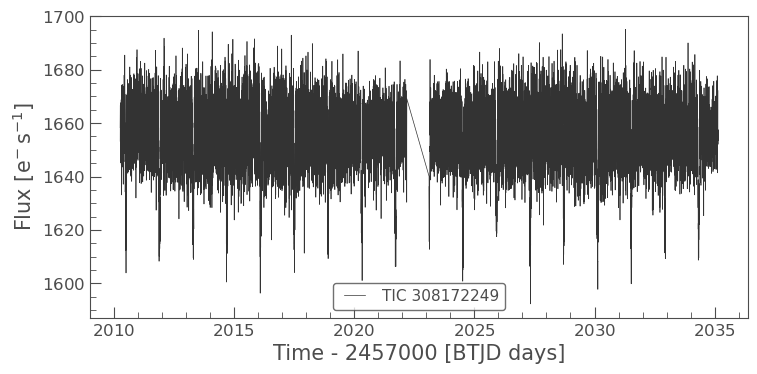

In [6]:
lc.plot()

In [7]:
search_result_pixel = lk.search_targetpixelfile(target = "WASP-135")
search_result_pixel

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 26,2020,SPOC,120,308172249,0.0
1,TESS Sector 26,2020,TESS-SPOC,1800,308172249,0.0


In [8]:
tpf = search_result_pixel[0].download()

<AxesSubplot:title={'center':'Target ID: 308172249, Cadence: 563625'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

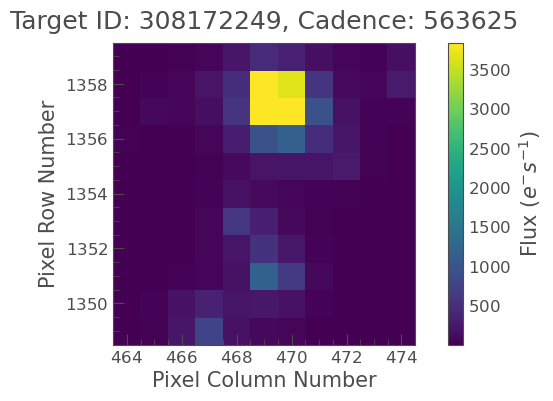

In [9]:
tpf.plot()

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

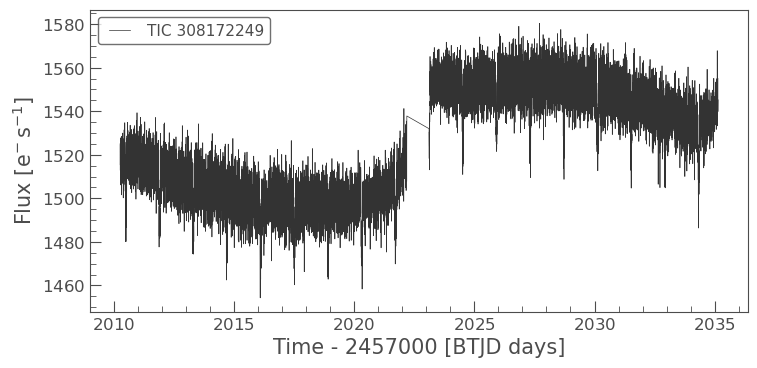

In [10]:
lc_pixel = tpf.to_lightcurve()
lc_pixel.plot()

C:\Users\jtear\anaconda3\lib\site-packages\lightkurve\search.py:260: LightkurveWarning: `cutout_size` can only be specified for TESS Full Frame Image cutouts.
  warnings.warn(


<AxesSubplot:title={'center':'Target ID: 308172249, Cadence: 563625'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

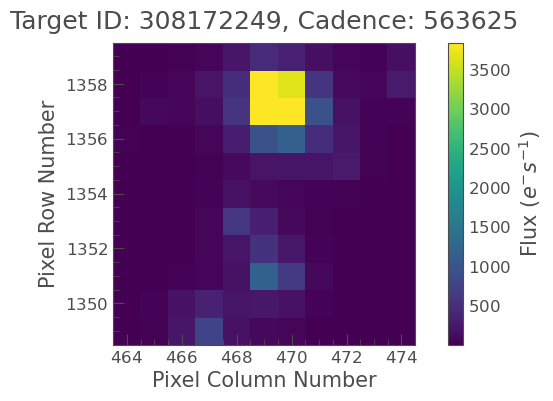

In [11]:
tpf_cutout = search_result_pixel[0].download(cutout_size=10)
tpf_cutout.plot()